In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define paths to your folders
top_view_folder = r"C:\Users\raulo\Desktop\Tracks\Top"
front_view_folder = r"C:\Users\raulo\Desktop\Tracks\Front"

# Function to load data from a folder
def load_data(folder, model_name):
    all_files = [f for f in os.listdir(folder) if f.endswith('.csv')]
    data_list = []
    
    for file in all_files:
        file_path = os.path.join(folder, file)
        df = pd.read_csv(file_path, sep=",")
        
        # Select only columns that end with ".2"
        selected_cols = [col for col in df.columns if col.endswith(".2")]
        df_selected = df[selected_cols]
        
        # Reshape for plotting
        df_melted = df_selected.melt(var_name="Bodypart", value_name="RMSE")
        df_melted["Model"] = model_name  # Add model label
        
        data_list.append(df_melted)
    
    return pd.concat(data_list, ignore_index=True)

In [3]:
# Load data from both models
top_view_data = load_data(top_view_folder, "Top View Model")
front_view_data = load_data(front_view_folder, "Front View Model")

In [4]:
top_view_data["ShortLabel"] = top_view_data["Bodypart"].str.extract(r"^(.*)\.")[0]
front_view_data["ShortLabel"] = front_view_data["Bodypart"].str.extract(r"(.*)_")[0]

<Figure size 1200x600 with 0 Axes>

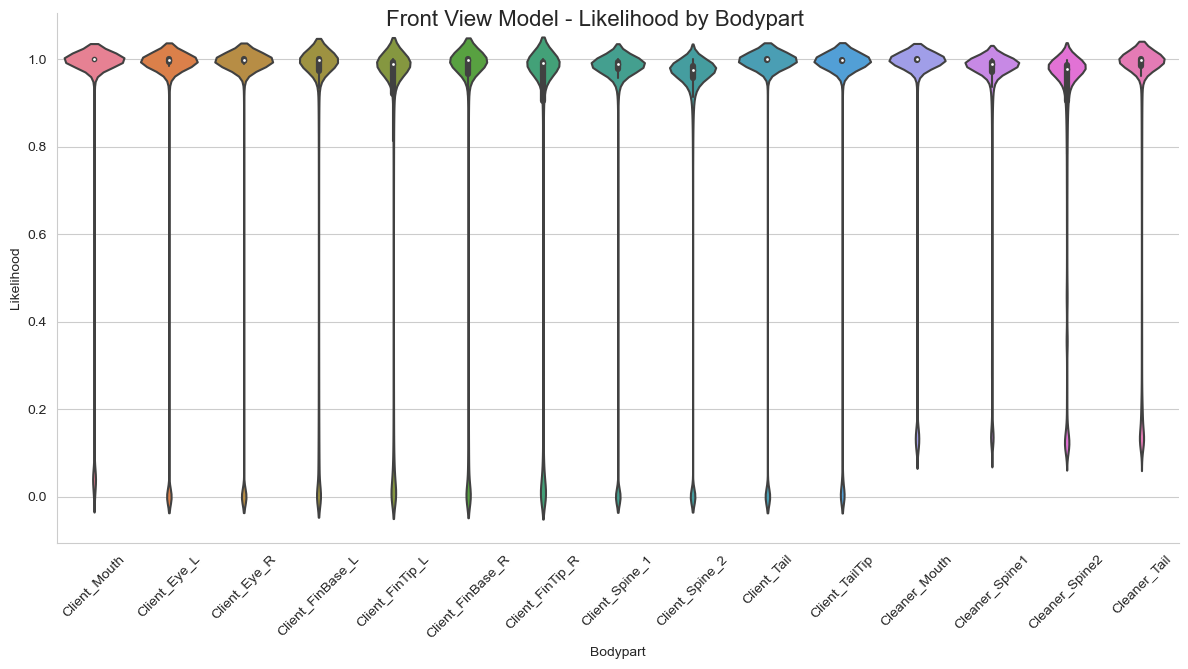

In [5]:
# # Plot Top View Model
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
g1 = sns.catplot(
    data=top_view_data, x="ShortLabel", y="RMSE", kind="violin", 
    palette="husl", height=6, aspect=2
)
g1.set_axis_labels("Bodypart", "Likelihood")
g1.fig.suptitle("Front View Model - Likelihood by Bodypart", fontsize=16)
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

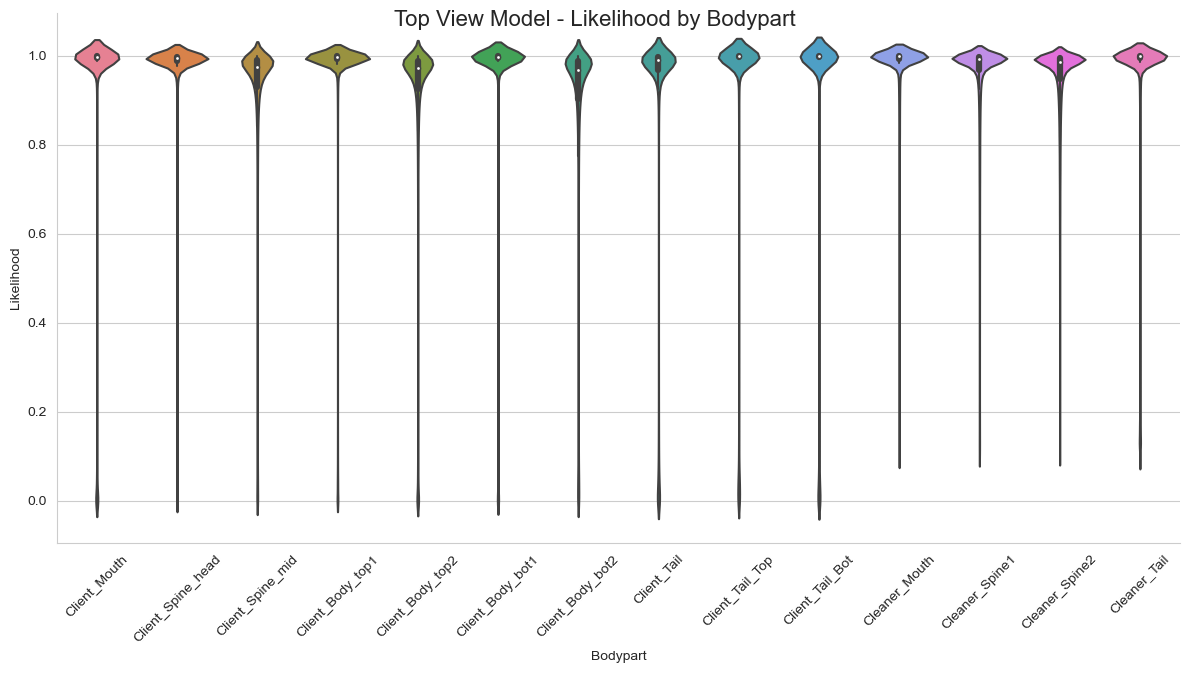

In [6]:
# # Plot Front View Model
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
g2 = sns.catplot(
    data=front_view_data, x="ShortLabel", y="RMSE", kind="violin", 
    palette="husl", height=6, aspect=2
)
g2.set_axis_labels("Bodypart", "Likelihood")
g2.fig.suptitle("Top View Model - Likelihood by Bodypart", fontsize=16)
plt.xticks(rotation=45)
plt.show()

## Top View RMSE

In [82]:
df_top_rmse = pd.read_csv(r"C:\Users\raulo\Desktop\top_view.csv", header=2)
df_top_rmse = df_top_rmse[~df_top_rmse.iloc[:, 0].str.contains("scorer|individuals|bodyparts", na=False)]
df_top_rmse = df_top_rmse.apply(pd.to_numeric, errors='coerce')
rmse_df_top_rmse = df_top_rmse.loc[:, ~df_top_rmse.columns.str.endswith('.1')]

In [83]:
client_cols_top_rmse = [col for col in rmse_df_top_rmse.columns if 'Client' in col]
cleaner_cols_top_rmse = [col for col in rmse_df_top_rmse.columns if 'Cleaner' in col]

client_df_top_rmse = rmse_df_top_rmse[client_cols_top_rmse]
cleaner_df_top_rmse = rmse_df_top_rmse[cleaner_cols_top_rmse]

client_df_top_rmse = client_df_top_rmse.dropna()
cleaner_df_top_rmse = cleaner_df_top_rmse.dropna()

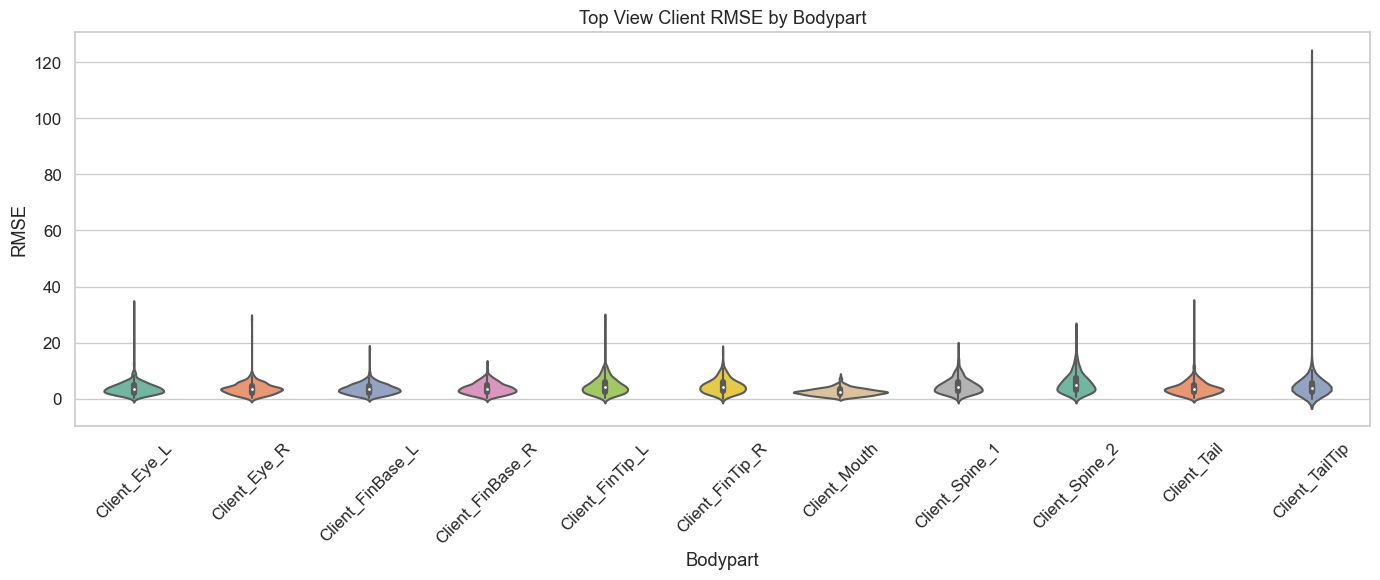

In [85]:
# Melt for plotting
client_melted_top_rmse = client_df_top_rmse.melt(var_name="Bodypart", value_name="RMSE")

client_melted_top_rmse["Bodypart"] = client_melted_top_rmse["Bodypart"].str.split(".").str[0]

# Plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=client_melted_top_rmse, x="Bodypart", y="RMSE", palette="Set2")
plt.xticks(rotation=45)
plt.title("Top View Client RMSE by Bodypart")
plt.tight_layout()
plt.show()

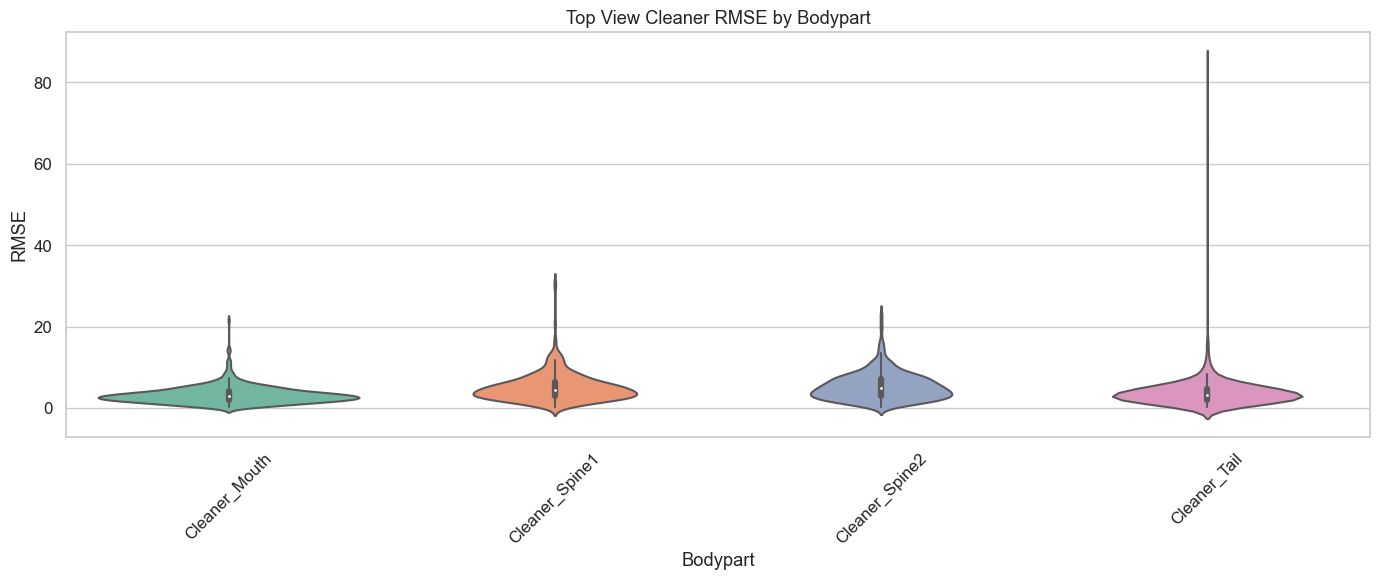

In [86]:
# Melt for plotting
cleaner_melted_top_rmse = cleaner_df_top_rmse.melt(var_name="Bodypart", value_name="RMSE")

# Optional: simplify label (remove ".1" or anything after a dot)
cleaner_melted_top_rmse["Bodypart"] = cleaner_melted_top_rmse["Bodypart"].str.split(".").str[0]

# Plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=cleaner_melted_top_rmse, x="Bodypart", y="RMSE", palette="Set2")
plt.xticks(rotation=45)
plt.title("Top View Cleaner RMSE by Bodypart")
plt.tight_layout()
plt.show()

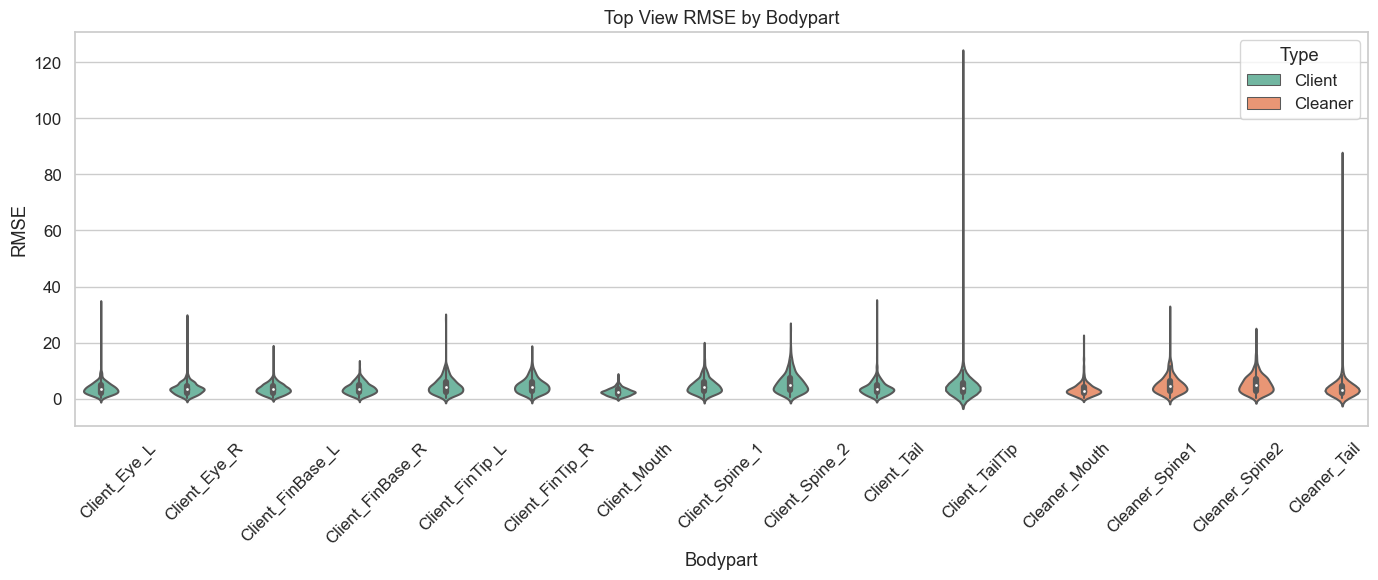

In [91]:
# Add 'Type' column to each
client_melted_top_rmse["Type"] = "Client"
cleaner_melted_top_rmse["Type"] = "Cleaner"

# Combine both DataFrames
combined_df_top_rmse = pd.concat([client_melted_top_rmse, cleaner_melted_top_rmse], ignore_index=True)

# Plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=combined_df_top_rmse, x="Bodypart", y="RMSE", hue="Type", palette="Set2", split=False)
plt.xticks(rotation=45)
plt.title("Top View RMSE by Bodypart")
plt.tight_layout()
plt.savefig(r"D:\Desktop_Stuff\Faculdade\Mestrado Bioestatística\Tese\Paper_tese\Imagens\top_view_rmse_by_bodypart.png", dpi=300)
plt.show()

## Front View RMSE

In [67]:
df_front_rmse = pd.read_csv(r"C:\Users\raulo\Desktop\front_view.csv", header=2)
df_front_rmse = df_front_rmse[~df_front_rmse.iloc[:, 0].str.contains("scorer|individuals|bodyparts", na=False)]
df_front_rmse = df_front_rmse.apply(pd.to_numeric, errors='coerce')
rmse_df_front_rmse = df_front_rmse.loc[:, ~df_front_rmse.columns.str.endswith('.1')]

In [69]:
client_cols_front_rmse = [col for col in rmse_df_front_rmse.columns if 'Client' in col]
cleaner_cols_front_rmse = [col for col in rmse_df_front_rmse.columns if 'Cleaner' in col]

client_df_front_rmse = rmse_df_front_rmse[client_cols_front_rmse]
cleaner_df_front_rmse = rmse_df_front_rmse[cleaner_cols_front_rmse]

client_df_front_rmse = client_df_front_rmse.dropna()
cleaner_df_front_rmse = cleaner_df_front_rmse.dropna()

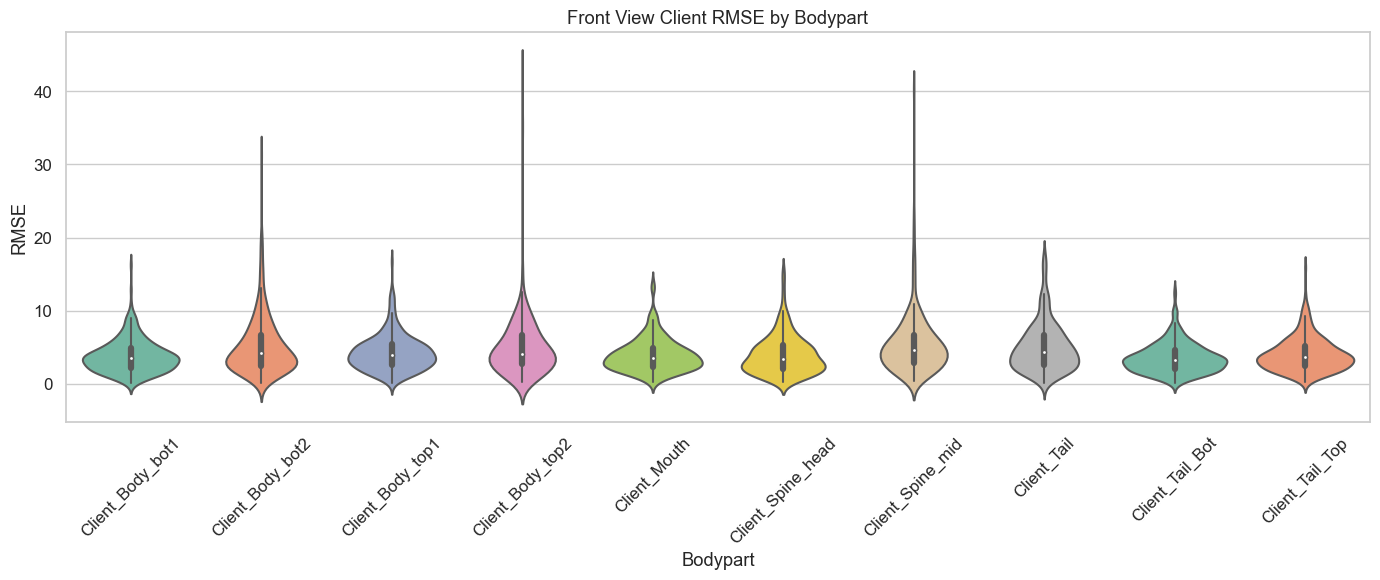

In [78]:
# Melt for plotting
client_melted_front_rmse = client_df_front_rmse.melt(var_name="Bodypart", value_name="RMSE")

client_melted_front_rmse["Bodypart"] = client_melted_front_rmse["Bodypart"].str.split(".").str[0]

# Plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=client_melted_front_rmse, x="Bodypart", y="RMSE", palette="Set2")
plt.xticks(rotation=45)
plt.title("Front View Client RMSE by Bodypart")
plt.tight_layout()
plt.show()

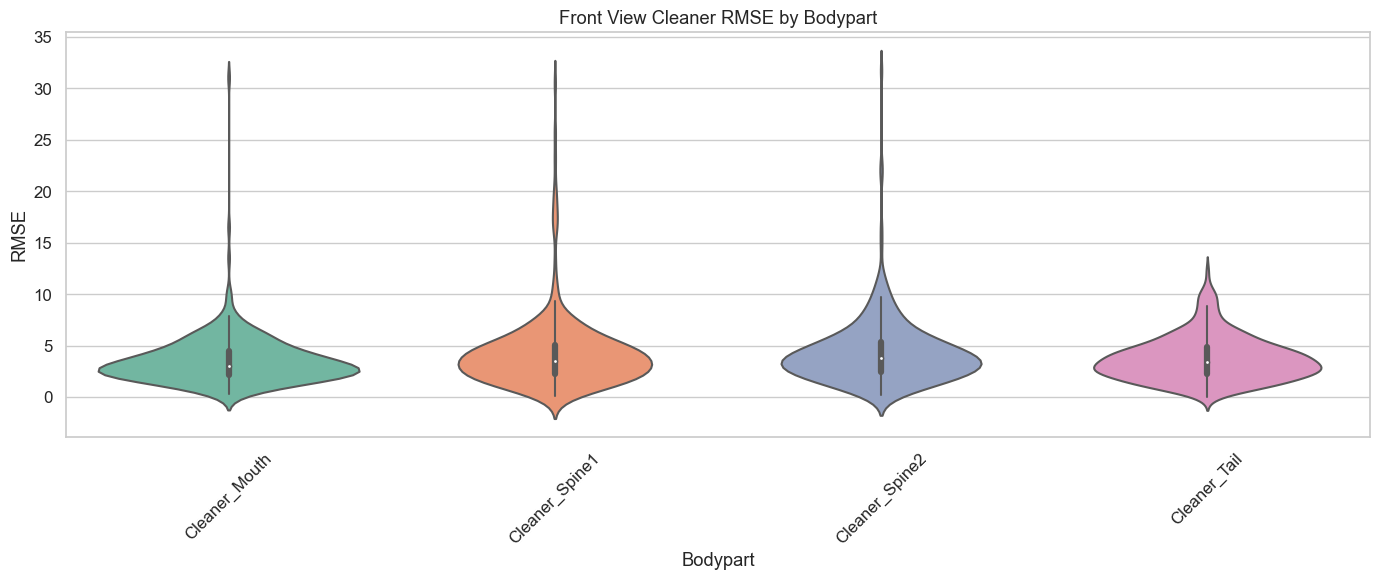

In [79]:
# Melt for plotting
cleaner_melted_front_rmse = cleaner_df_front_rmse.melt(var_name="Bodypart", value_name="RMSE")

cleaner_melted_front_rmse["Bodypart"] = cleaner_melted_front_rmse["Bodypart"].str.split(".").str[0]

# Plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=cleaner_melted_front_rmse, x="Bodypart", y="RMSE", palette="Set2")
plt.xticks(rotation=45)
plt.title("Front View Cleaner RMSE by Bodypart")
plt.tight_layout()
plt.show()

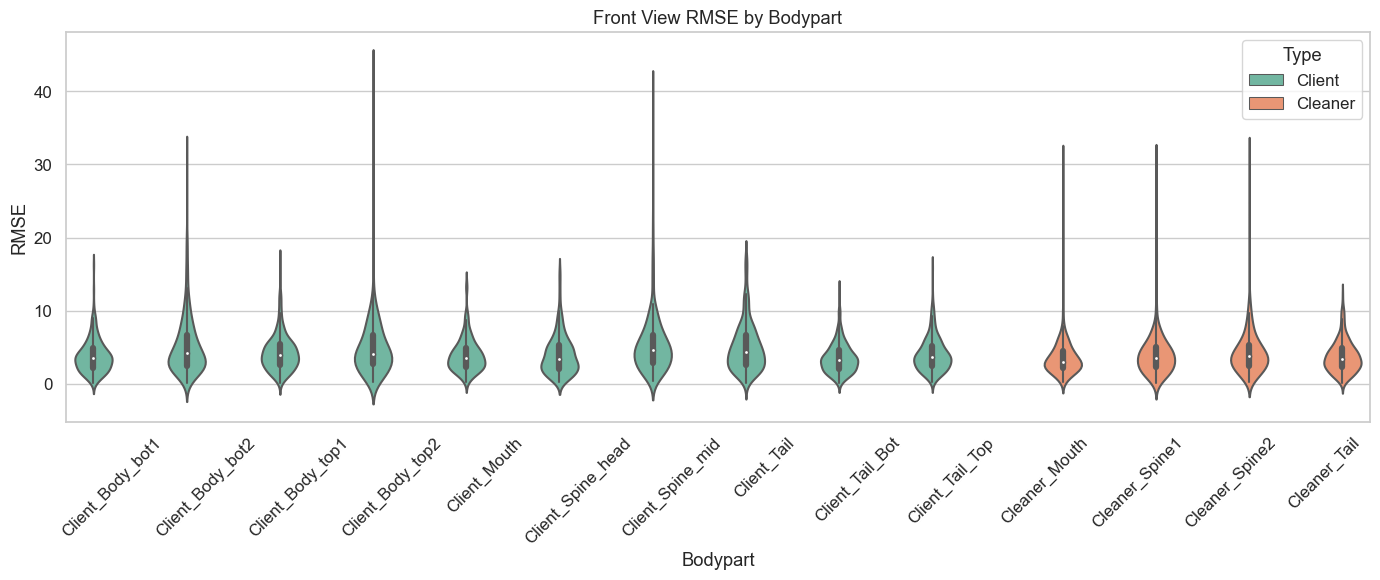

In [90]:
# Add 'Type' column to each
client_melted_front_rmse["Type"] = "Client"
cleaner_melted_front_rmse["Type"] = "Cleaner"

# Combine both DataFrames
combined_front_df = pd.concat([client_melted_front_rmse, cleaner_melted_front_rmse], ignore_index=True)

# Plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=combined_front_df, x="Bodypart", y="RMSE", hue="Type", palette="Set2", split=False)
plt.xticks(rotation=45)
plt.title("Front View RMSE by Bodypart")
plt.tight_layout()
plt.savefig(r"D:\Desktop_Stuff\Faculdade\Mestrado Bioestatística\Tese\Paper_tese\Imagens\front_view_rmse_by_bodypart.png", dpi=300)

plt.show()